Create a stack from of subtypes maps from all task and trial

In [1]:
import seaborn as sns
import os
import numpy as np
from scipy import stats, integrate
import scipy.io as sio
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import functools
import seaborn as sns

In [2]:
# load good stuff
%matplotlib inline
%load_ext rpy2.ipython
%load_ext oct2py.ipython
sns.set(color_codes=True)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#  Set path
path_root = '/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/'
list_subtype_folder = ['subtype_5_spm_EMOTION_23-May-2017','subtype_5_spm_GAMBLING_19-Jun-2017','subtype_5_spm_LANGUAGE_18-Jun-2017',
                      'subtype_5_spm_MOTOR_19-Jun-2017','subtype_5_spm_RELATIONAL_18-Jun-2017','subtype_5_spm_SOCIAL_18-Jun-2017',
                       'subtype_5_spm_WM_18-Jun-2017']
list_subtype = ['sub1','sub2','sub3','sub4','sub5']

In [5]:
%%octave -o mat_weight
clear
cd /home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_RELATIONAL_18-Jun-2017
mat_weight = load('subtype_weights.mat');
whos

Variables in the current scope:

   Attr Name            Size                     Bytes  Class

   ==== ====            ====                     =====  ===== 

        mat_weight      1x1                      99111  struct

Total is 1 element using 99111 bytes

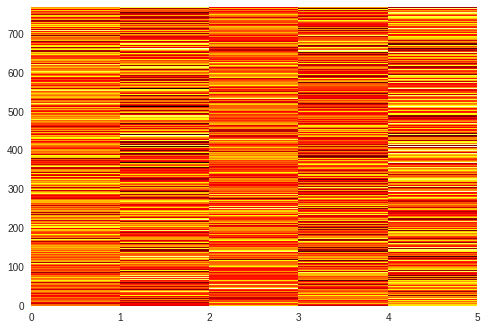

In [6]:
plt.pcolor(mat_weight.weight_mat[:,:,0], cmap='hot')
plt.show()

In [11]:
list_trial

Cell(['0bk', '2bk', 'body', 'contrast_2bk_vs_0bk',
       'contrast_body_vs_places', 'contrast_faces_vs_places',
       'contrast_tools_vs_places', 'faces', 'places', 'tools'])

In [12]:
for cx,folder in enumerate(list_subtype_folder):
    mat_file = os.path.join(path_root,folder,'subtype_weights.mat')
    %octave_push mat_file
    %octave mat_load = load(mat_file);
    %octave_pull mat_load
    #list_trial  = mat_load.list_network
    path_network =  os.path.join(path_root,folder,'networks/')
    list_trial  = [f for f in os.listdir(path_network)]
    for ix,trial_name in enumerate(list_trial) :
        if np.size(list_trial) == 1:
            subtype = mat_load.weight_mat
        else:
            subtype = mat_load.weight_mat[:,:,ix]
        subtype_name = ['{}_{}'.format(subt,trial_name) for subt in list_subtype ]
        if ix == 0:
            subtype_final = subtype
            subtype_name_final = subtype_name
        else:
            subtype_final = [np.concatenate([subtype_final[x], subtype[x]]) for x in range(np.shape(subtype)[0])]
            subtype_name_final = np.concatenate([subtype_name_final, subtype_name]) 
    # make dataframe
    all_stack_df = pd.DataFrame(subtype_final,columns=subtype_name_final)
    all_stack_df.insert(0, 'ID', mat_load.list_subject)
    all_stack_df.to_csv(os.path.join(path_root,folder,'{}_subtype_stack.csv'.format(''.join(c for c in folder if c.isupper())[:-1]))
                        ,index=False)
    # Merge dataframes
    if cx == 0:
        dfs = all_stack_df
    else:
        dfs = [dfs,all_stack_df]
        dfs = functools.reduce(lambda left,right: pd.merge(left,right,on='ID'), dfs)
# Save final stack
dfs.to_csv(os.path.join(path_root,'pheno/all_subtypes_weights_stack.csv'),index=False)

In [29]:
dfs.head()

,ID,sub1_fear,sub2_fear,sub3_fear,sub4_fear,sub5_fear,sub1_win,sub2_win,sub3_win,sub4_win,...,sub1_tools,sub2_tools,sub3_tools,sub4_tools,sub5_tools,sub1_0bk,sub2_0bk,sub3_0bk,sub4_0bk,sub5_0bk
0,HCP100307,-0.539191,-0.050346,0.543340,-0.515124,0.280902,-0.006883,-0.033195,0.217270,-0.037873,...,-0.022100,-0.617686,0.630615,0.475780,-0.649307,-0.180732,0.030449,-0.162491,0.340034,-0.353718
1,HCP100408,0.652690,0.270182,-0.553928,0.544952,-0.514009,0.098829,-0.181294,-0.039191,0.338578,...,-0.249429,0.710111,-0.676625,-0.333601,0.618380,0.284870,0.167466,-0.026191,-0.518541,0.548890
2,HCP100610,-0.162517,0.041254,0.231615,-0.223435,0.027874,-0.107612,0.020006,0.067681,0.037036,...,-0.099178,-0.091301,0.100565,0.122256,-0.103447,0.177411,0.019632,-0.103602,-0.019403,-0.007325
3,HCP101006,0.094900,0.056115,-0.087209,0.109729,-0.099172,-0.345533,0.242849,0.237494,0.193582,...,-0.168928,-0.096329,0.089120,0.221224,-0.136985,0.068738,-0.020197,0.025737,0.035850,-0.087892
4,HCP101309,0.195645,0.321060,-0.084602,0.097719,-0.329707,-0.123095,0.147064,-0.164810,0.006652,...,0.104298,0.270694,-0.275675,-0.281790,0.301439,-0.006631,-0.006952,0.090228,-0.117444,0.132384


In [36]:
# Make matrix out of the remaining guys except subject ID column
stack_mat = dfs.ix[:,1:].as_matrix()
# Normalize these guys by column
stack_norm = (stack_mat - np.mean(stack_mat, 0))/np.std(stack_mat, 0)


110
down vote
Assumed imports:

import pandas as pd
John Galt's answer is basically a reduce operation. If I have more than a handful of dataframes, I'd put them in a list like this (generated via list comprehensions or loops or whatnot):

dfs = [df0, df1, df2, dfN]
Assuming they have some common column, like name in your example, I'd do the following:

df_final = reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)
That way, your code should work with whatever number of dataframes you want to merge.

Edit August 1, 2016: For those using Python 3: reduce has been moved into functools. So to use this function, you'll first need to import that module.

In [37]:
# Save normalized stack
ind = dfs.index
stack_norm_df = pd.DataFrame(stack_norm, columns=dfs.ix[:,1:].columns.get_values(),index=ind)
stack_norm_df.insert(0, 'IDs', dfs.ID)
# save
stack_norm_df.to_csv(os.path.join(path_root,'pheno/all_subtypes_weights_stack.csv'),index=False)